In [1]:
import json
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
geoplaces = json.load(open("../metadata/geoplaces.json"))

In [4]:
asia_train = geoplaces["usa_train"]

In [5]:
len_locs = len(asia_train["metadata"])

In [6]:
random_id = np.random.choice(np.arange(len_locs))

meta = asia_train['metadata'][random_id]
print("\nTitle: %s, \nDescription: %s, \nTags: %s"%(meta["caption"], meta["description"], meta["tags"]))

url = asia_train['metadata'][random_id]['url']

response = requests.get(url)
image_data = response.content

img = Image.open(BytesIO(image_data))


Title: Josh Gibson, 
Description: Josh Gibson was a baseball player who was elected to the Baseball Hall of Fame in 1974, but never played in Major League Baseball.  He spent his whole baseball life in the Negro League.  During his playing time, he would be elected to 10 Negro League All Star teams, and would help his teams win 2 Negro League World Series.   He was known for his power and some considered him the first black power hitter.  He was often called the black Babe Ruth.  It was also said that people who had seen both Gibson and Ruth play, called Ruth the white Josh Gibson.  Josh Gibson is buried in Allegheny Cemetery in Pittsburgh, Pa., 
Tags: joshgibson,baseball,negroleague,black,baseballhalloffame,halloffame,pittsburgh,pennsylvania,alleghenycemetery,burial,grave,tomb,cemetery


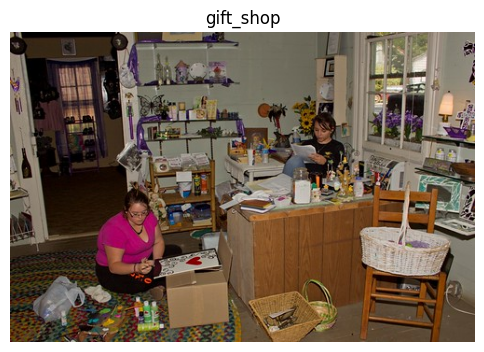

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(str(asia_train['annotations'][random_id]['class_name']))
plt.axis('off');

In [27]:
# 6339433190: The image likely features a starfish viewed from the Tokyo Tower observation deck in Tokyo, Japan, with a backdrop of the city's skyline. class: observation deck

# 2716953993: The image likely features a scene from an amusement park in Taiwan. class: amusement_park

# 9803532016: The image likely features an apartment building or house with architectural elements in Osaka, Japan. class: apartment_building_outdoor

# negative
# 217962358: The image likely features a pair of pink Converse shoes in a cafe setting, with a contemplative description about whether or not to take a photo of them. class: cafeteria

In [2]:
blip = json.load(open("../blip_condensed_caption_geoplaces_asia_13b.json"))['captions']
llm = json.load(open("../metadata/condensed_caption_geoplaces_asia_13b.json"))['captions']

In [7]:
for idx in range(len(blip)):
    print(blip[idx]["flickr_id"])
    assert blip[idx]["flickr_id"] == llm[idx]["flickr_id"]
    print(blip[idx]['condensed_caption'])
    print(llm[idx]['condensed_caption'])
    print()

6779357522
an altar in the Church of the Holy Sepulchre in Jerusalem.
beautiful mosaic inside the Dormition Abbey in Jerusalem.

5242890175
the Dormition Abbey in the old city of Jerusalem, resembling a mighty fortress.
majestic Dormition Abbey in Jerusalem.

4128884590
the Church of the Holy Sepulchre from the top of a hill in Jerusalem.
the Hagia Maria Sion Benedictine Abbey and Bell Tower on Mount Zion in Jerusalem's Old City, surrounded by cemeteries of different religions.

4531159796
crumbling ruins of a historic monastery in Cyprus, once a thriving Augustinian community.
Bellapais Abbey in Kyrenia District, Cyprus, built in the 13th century by the French King Hugh III and occupied illegally by the Turkish army since 1974.

4544321250
Bellapais Abbey's tower in Santander, Cyprus.
Bellapais Abbey, a historic monastery in Cyprus occupied illegally by the Turkish army since 1974.

4789037636
majestic wooden hallway with pews and a chandelier.
historic monastery in Lebanon.

45436792

AssertionError: 

In [8]:
llm_caps = [c["condensed_caption"] for c in llm]

In [9]:
len(llm_caps)

189331

In [10]:
sorted(llm_caps, key=lambda v:len(v.split(" ")), reverse=True)

['gentle smile. \n\n(Note: I have translated the title and description into English, but I have not included the tags in the answer as they are not relevant to the image itself.)\n\nThe title "お地蔵さんの微笑み" can be translated to "Bodhisattva\'s Smile", and the description "2012年10月14日、長野県小県郡青木村にある修那羅峠の石仏。「しょなら」と一般的に読むそうです。" can be translated to "October 14th, 2012, a stone image of bodhisattva in Shonaratouge-mountain pass, Chiisagata county, Nagano, Japan. The stone image has more than 800 unique features and is surrounded by offerings, giving it a gentle smile."\n\nThe image depicts a stone image of a bodhisattva with a gentle smile, surrounded by offerings such as persimmon and flowers. The image is taken in a mountain pass in Nagano, Japan during late summer or early fall.',
 'An image of: Sunset at Wanggong Fishing Port in Taiwan\n\nPlease note that the title and tags have been translated into English as follows:\n\n* Title: In Taiwan Changhua. 台灣彰化.  SUNSET 落日時分 -- 王功漁港 DSC_7033\n\t+

In [15]:
long = [f for f in llm_caps if f.startswith("Sure!")]

In [16]:
len(long)

46

In [14]:
[l.partition("\n")[-1] for l in long]

['\nAn image of a delicious homemade salad and chicken lasagna.',
 '\nTitle: An image of a whale shark looking up\n\nDescription: (omitted)\n\nTags: (omitted)\n\nThe image shows a whale shark looking up towards the surface, with a blue background and a sense of depth and scale.',
 '\nTitle: Beluga\n\nDescription: Photo by my wife\n\nTags: pentax, k10d, sigma, sigma1770mmf2845dcmacro, aquarium, animal, fish, dolphin, beluga, geo:lat=35115617, geo:lon=140119822\n\nAn image of a beluga whale swimming in an aquarium.',
 '\nAn image of a serene bamboo grove in Kyoto, Japan.',
 '\nAn image of an elderly woman gardening in the Ooty Botanical Garden, surrounded by vibrant flowers.',
 '\nTitle: Yagura\n\nDescription: An image of a beautiful cherry blossom tree in front of a castle in Tokyo, Japan.\n\nTags: cherryblossom, tokyo, japan, castle\n\nCondensed Caption: An image of a stunning cherry blossom tree in front of a castle in Tokyo, Japan.',
 '\nTitle: koyasan - 高野山\nDescription: An image of